## Group MI1

*   Anuja Negi
*   Debapratim Jana
*   Muthukumar Pandaram
*   Tobiasz Budzynski

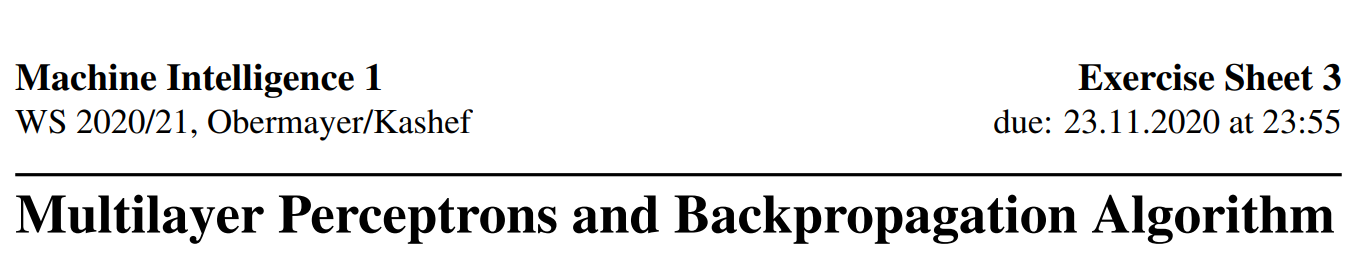

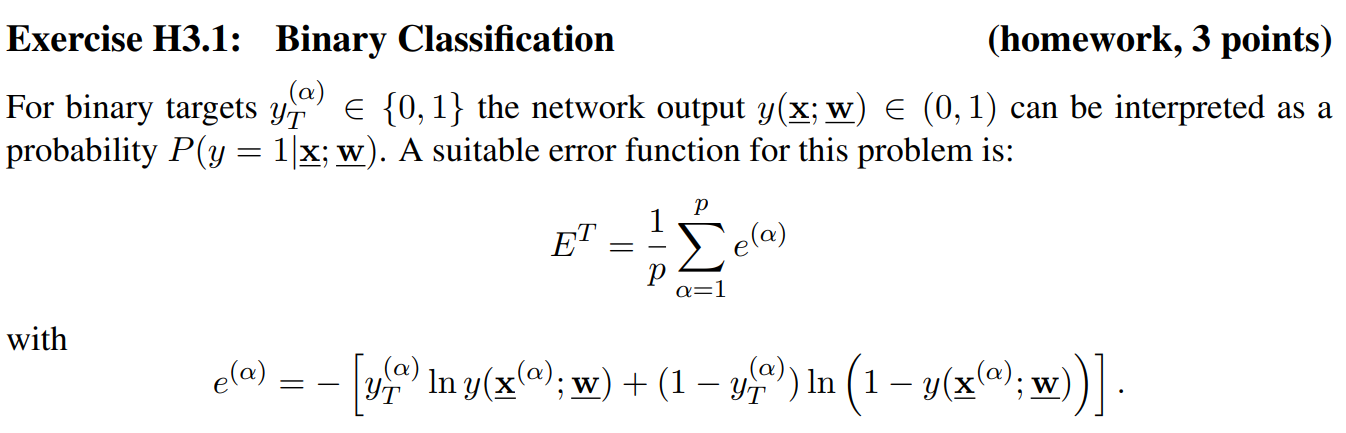

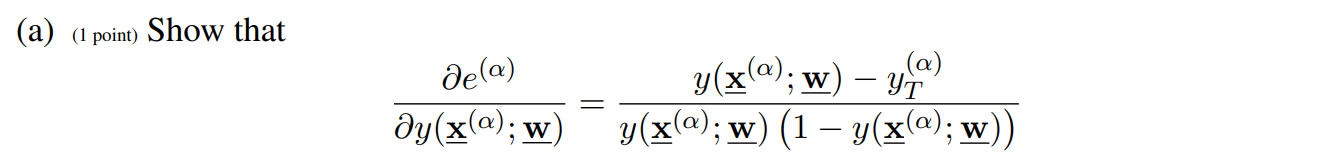

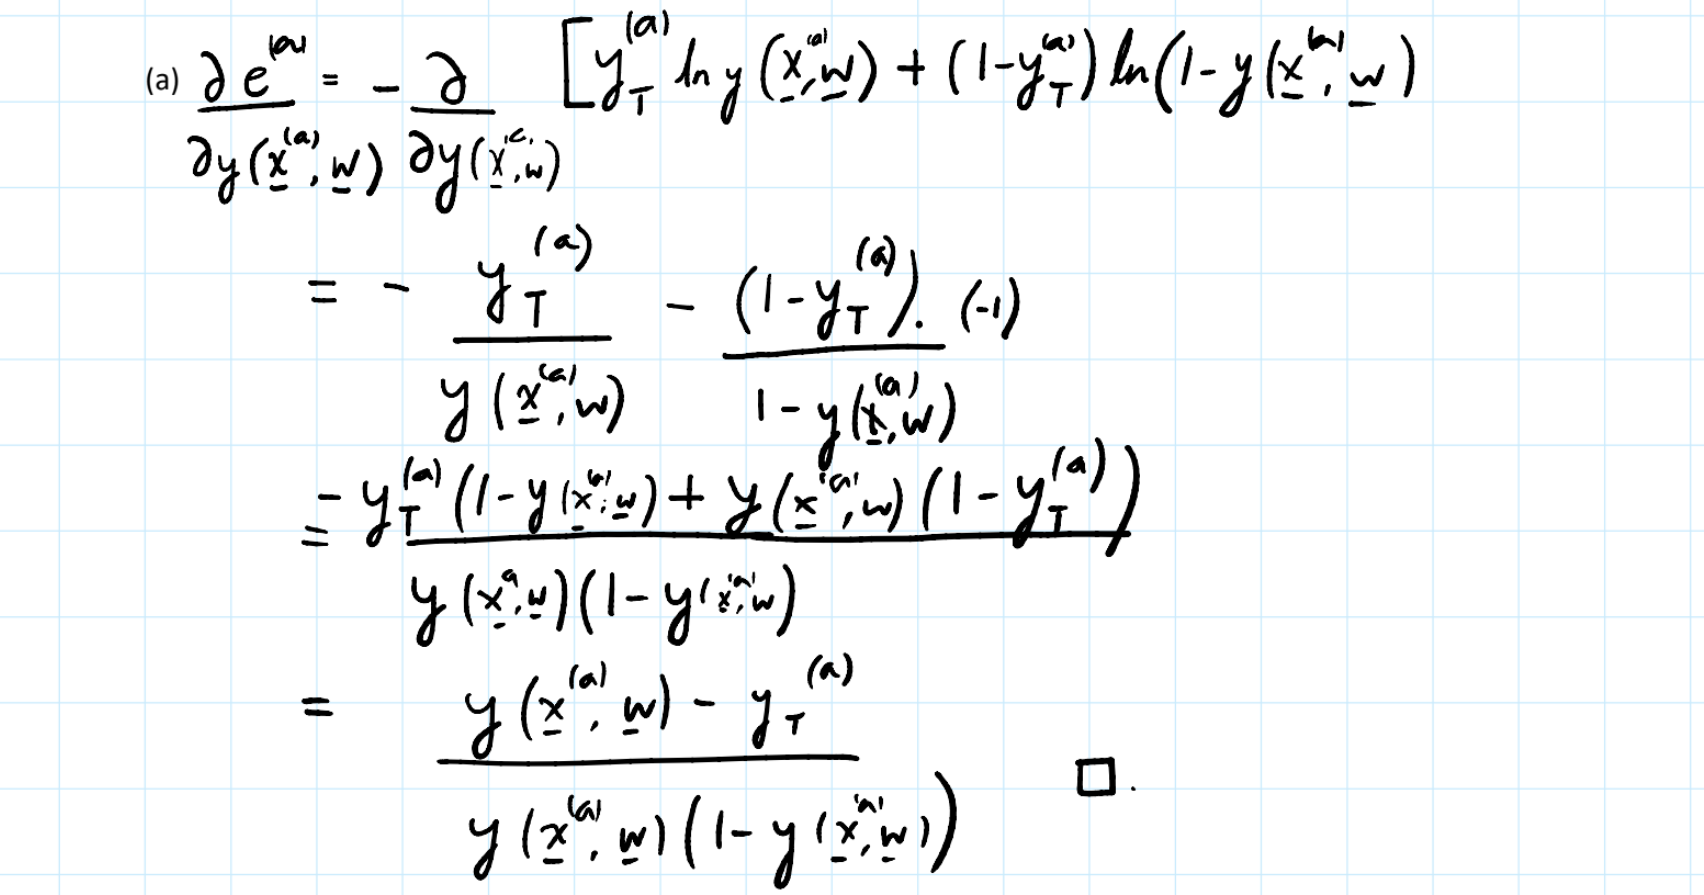

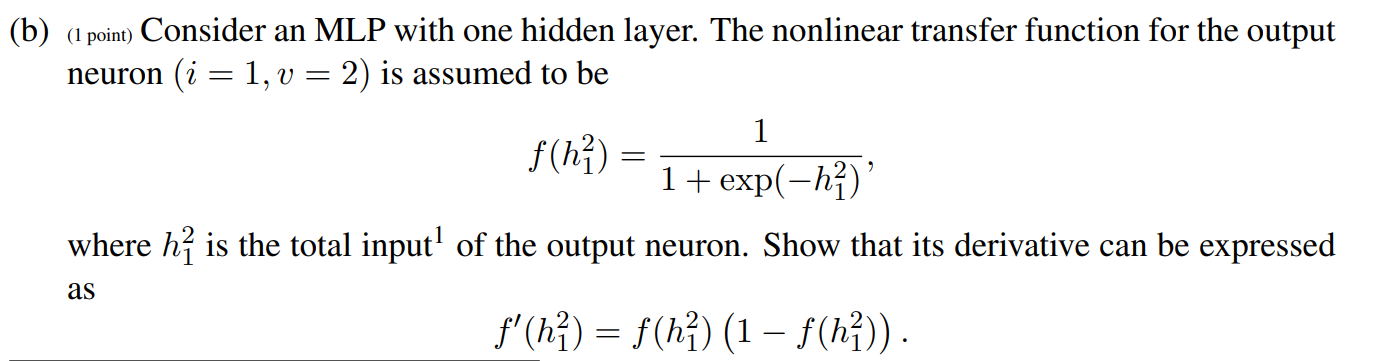

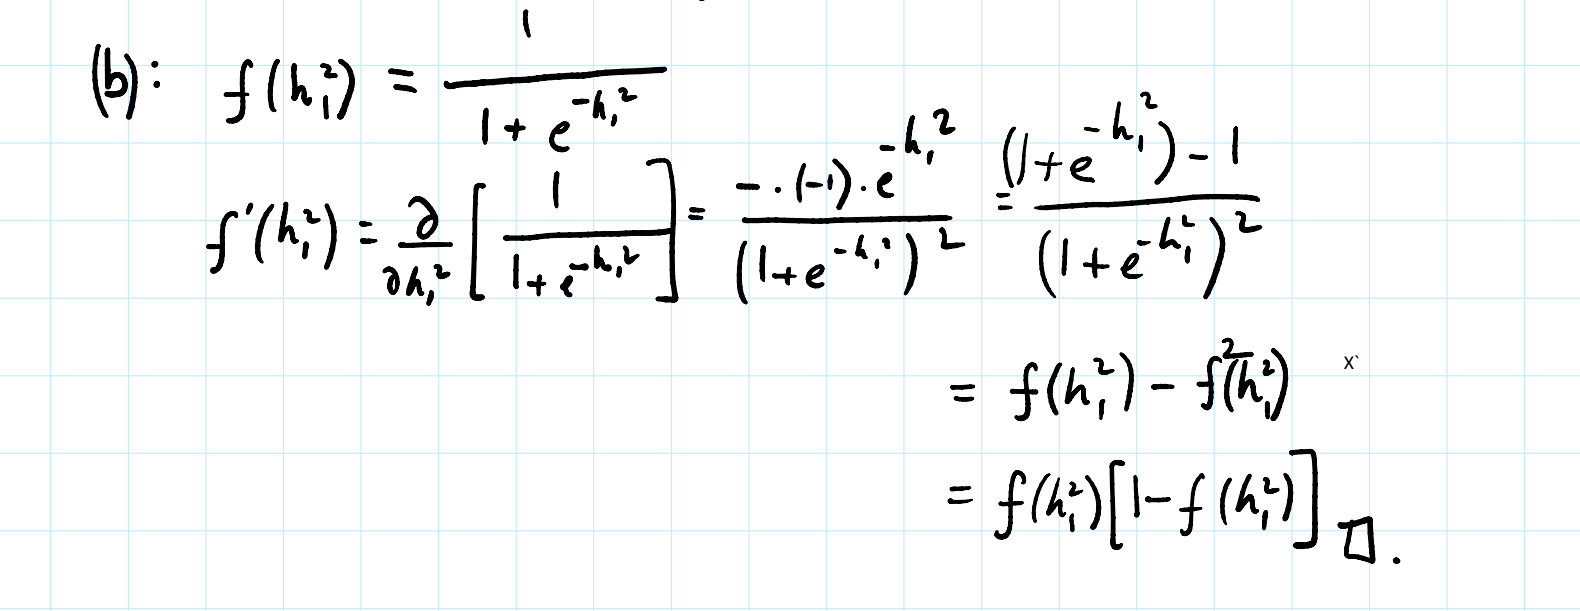

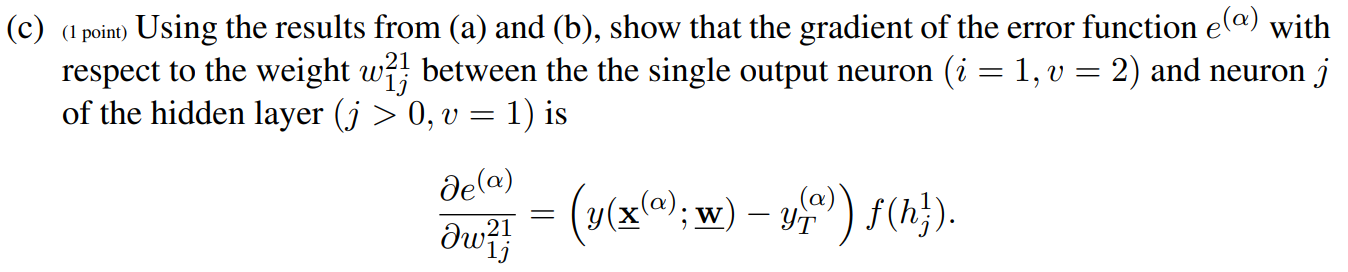

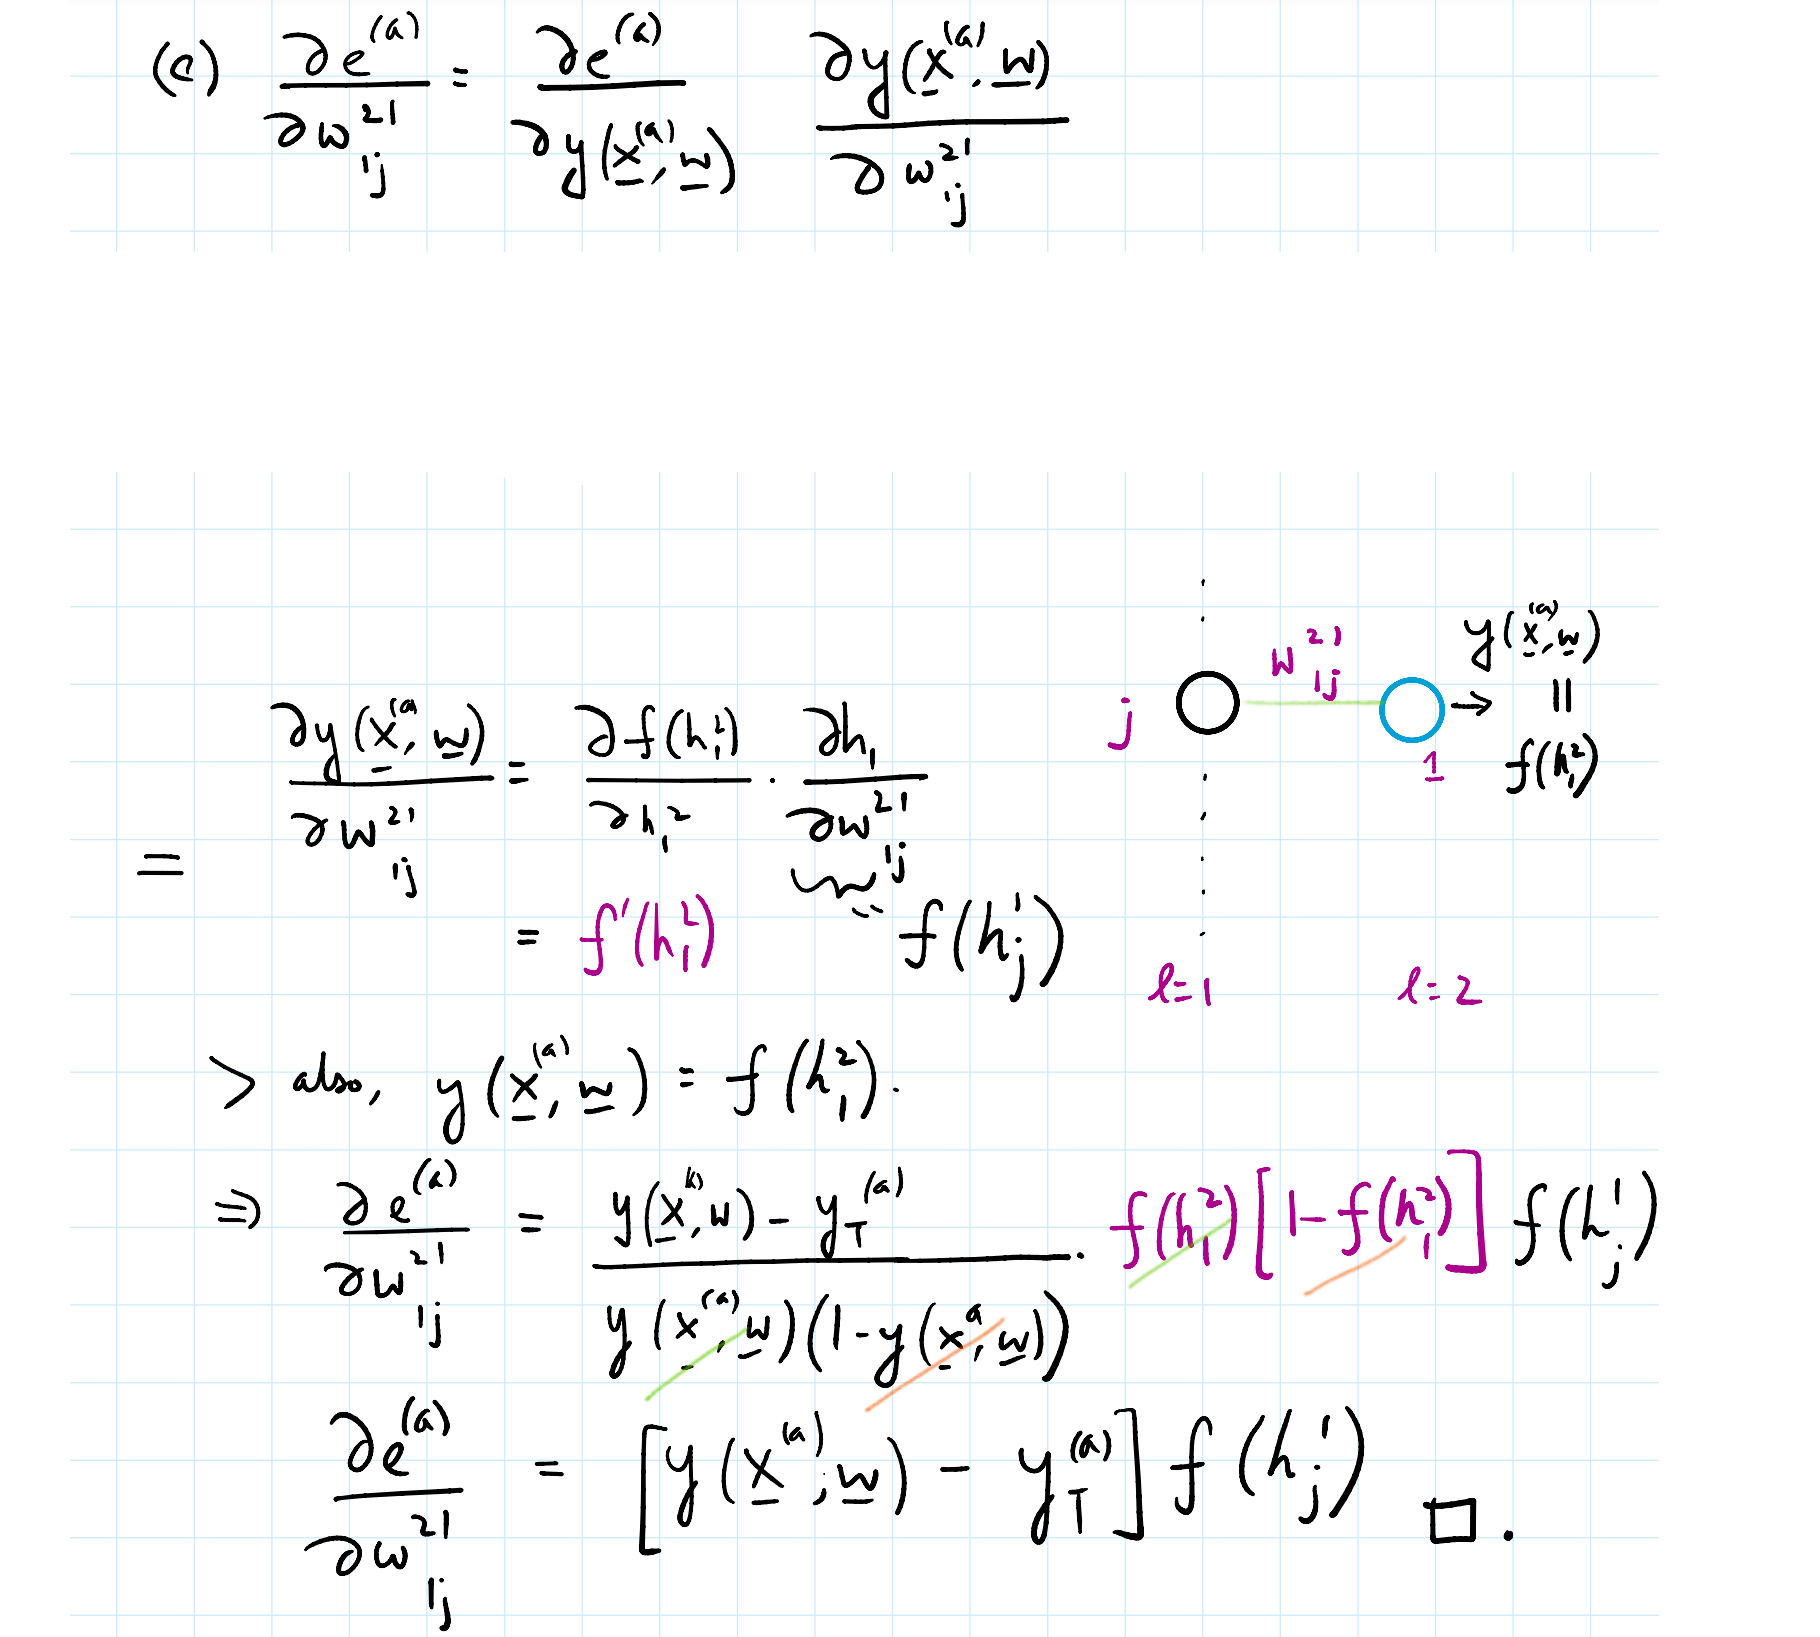

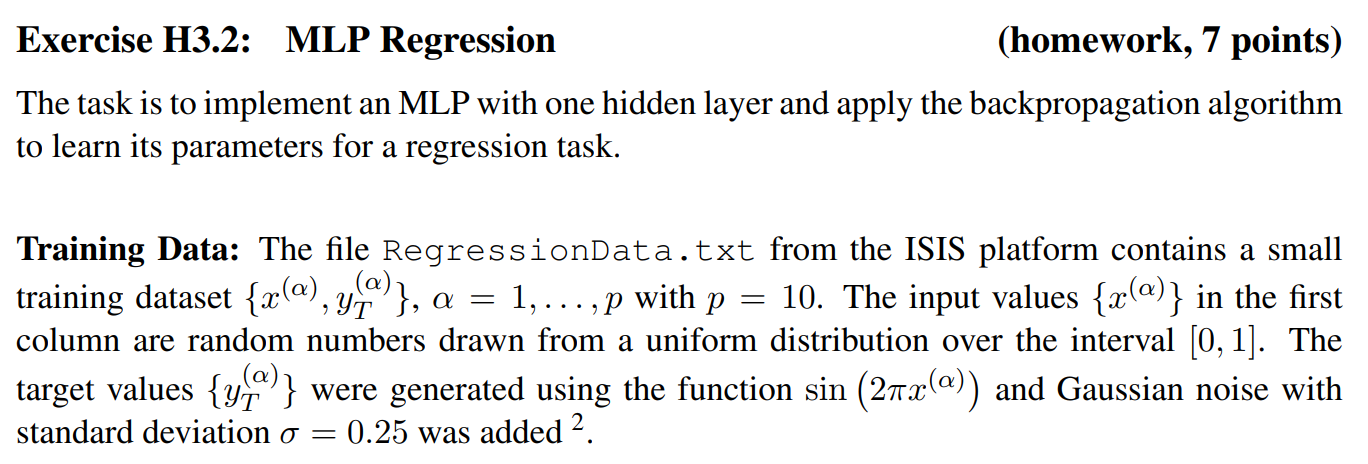

In [22]:
import numpy as np  
import math 
import matplotlib.pyplot as plt

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
PATH_TO_DATA = '/content/drive/MyDrive/BCCN/Courses/Machine Intelligence/Machine Intelligence I/Exercise Sheets/sheet03/RegressionData.txt'

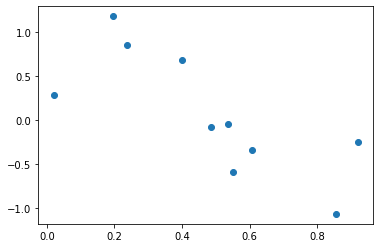

In [25]:
raw_data = np.genfromtxt(fname=PATH_TO_DATA, dtype=np.float)

x = raw_data[:,0]
y_t = raw_data[:,-1]

# Visualise Raw Data
plt.scatter(x,y_t)
plt.show()


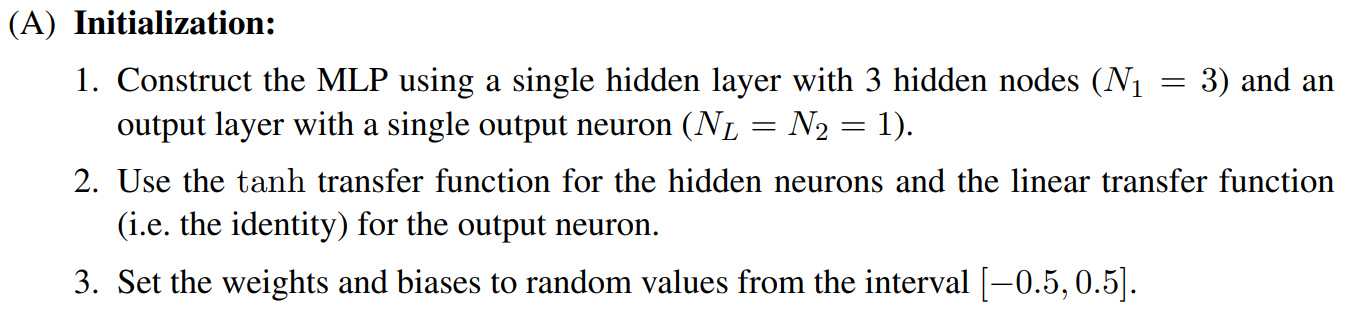

In [26]:
class MLP:
  def __init__(self, x, y):
    self.x = x 
    self.y_t = y_t  #y ground truth
    self.y_h = np.zeros((3, 1))   #y hidden layer
    self.num_of_l = 1
    self.w0 = np.random.uniform(-0.5, 0.5, size=(3,2))  
    self.w =  np.random.uniform(-0.5, 0.5, size=(1,4))

  def tanh(x):
    return np.tanh(x)
    
  def dtanh(self, x):
    return 1 - np.tanh(x)**2 



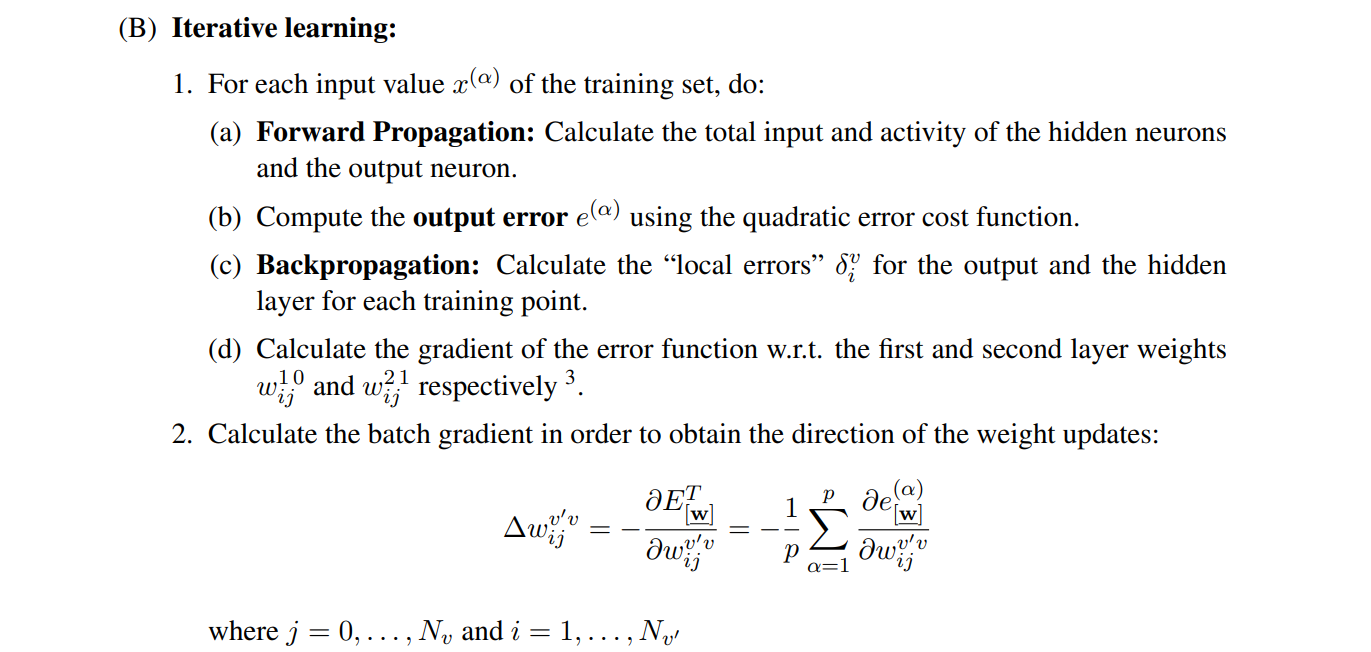

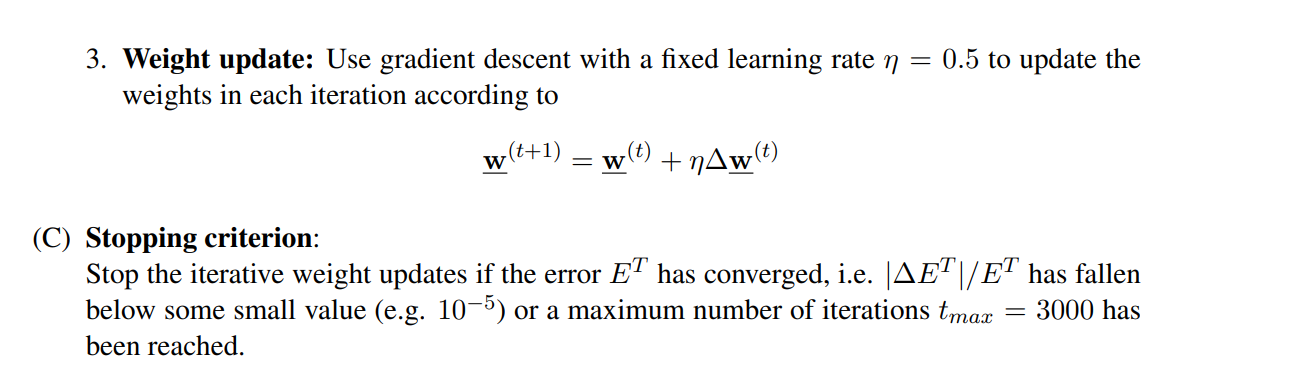

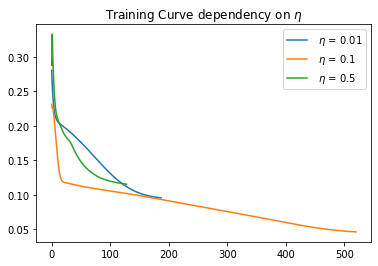

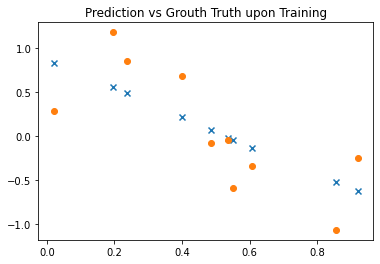

In [27]:
nn = MLP(x, y_t)
def mlp_training( w, w0 , lr = 0.5, num_epochs = 3_000, training = True): 

    mse_history = []

    for j in range(num_epochs):

        mse = 0 
        y_pred = []

        # For each of the training examples do: 

        for i in range(len(x)):
            
            # Forward Pass

            # Pass input
            input = np.array([-1, x[i]])        # input with bias to hidden layer

            h1 = np.dot(w0, input.T)            # Net input pass to hidden layer
            z1 = np.tanh(h1)                    # Pass activation function


            z1 = np.hstack((-1, z1))             # Insert bias node

            h2 = np.dot(w,z1.T)
            y = h2                               # linear/identity activaion 
           

            if not training:

                y_pred += [y]
            
            # Calculate error

            error       = 0.5*(y_t[i] - y)**2 

            grad_error  = (y - y_t[i]) 



            if training : 
                # Backward Pass

                del_L = 1 
                del_hidden = nn.dtanh(h1).reshape(1,3)*w[:,1:]*del_L
                
                
                # Calculate Gradients 
                grad_w   = (grad_error*del_L*z1).reshape(1,4)
                grad_w0  = (grad_error*del_hidden*(input.reshape(2,1))).T

                # Do the weight update

                w  = w  - lr*grad_w
                w0 = w0 - lr*grad_w0

            mse  += error

        # Append Epoch mean error
        mse_history += [mse/10]
        
        #stopping criterion
        if j>1:
            mse_new=mse_history[j]
            mse_old=mse_history[j-1]
            if ((abs(mse_new-mse_old))/mse_new)<=1e-3:                
                break   
    
    return mse_history , w , w0 , y_pred

nn = MLP(x,y_t)
lr = 0.5
num_epochs = 3_000

# Initialise Weights

w  =  nn.w
w0 =  nn.w0 

# Train MLP 

mse_history,  w_optimal , w0_optimal , y_pred = mlp_training(w, w0, 0.01)

LR = [0.01, 0.1, 0.5]
for i in range(len(LR)):
    plt.plot(mlp_training(w, w0, LR[i])[0], label = ' $\eta$ = %s' % LR[i]  )

lgd = plt.legend()
plt.title('Training Curve dependency on $\eta$')
plt.show()

# Compare prediction with ground truth data and we use the best learning rate we have.

y_pred = mlp_training(w_optimal, w0_optimal, 0.1, training = False)[-1]
plt.scatter(x, y_pred, marker = 'x')
plt.scatter(x,y_t)
plt.title('Prediction vs Grouth Truth upon Training')
plt.show()

Note about learning rate dependency: A learning rate $\eta = 0.5$ leads to a divergence after running for a large number of epochs such as 3000. So, conservatively, we choose $\eta = 0.05$ for running for a large number of epochs.


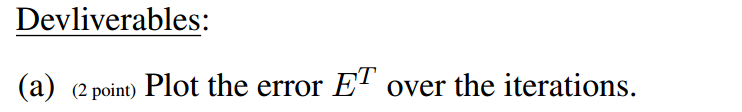

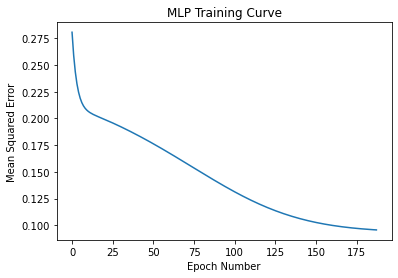

In [28]:
def training_curve(w,w0,lr):
  mse_history= mlp_training(w, w0, lr)[0]
  f1, (ax1) = plt.subplots(1)
  ax1.plot(mse_history)
  ax1.set_xlabel('Epoch Number')
  ax1.set_ylabel('Mean Squared Error')
  ax1.set_title('MLP Training Curve')
  return ax1

axa=training_curve(nn.w,nn.w0,0.01)


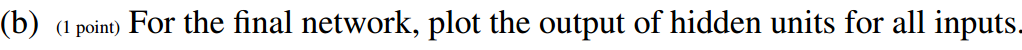

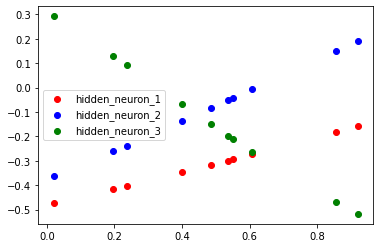

In [29]:
# make a function out of it
def plot_part_b(x,w0):
  inputs=np.hstack((np.repeat(-1, 10).reshape(10,1) , x.reshape(10,1)))

  hidden_layer_h1 = np.matmul(w0_optimal, inputs.T)
  hidden_layer_z1 = np.tanh(hidden_layer_h1)

  plt.scatter(inputs[:,1],hidden_layer_z1[0,:],c='r', label='hidden_neuron_1')
  plt.scatter(inputs[:,1],hidden_layer_z1[1,:],c='b', label='hidden_neuron_2')
  plt.scatter(inputs[:,1],hidden_layer_z1[2,:],c='g', label='hidden_neuron_3')
  plt.legend()
  return plt

axb=plot_part_b(x,nn.w0)
axb.show()

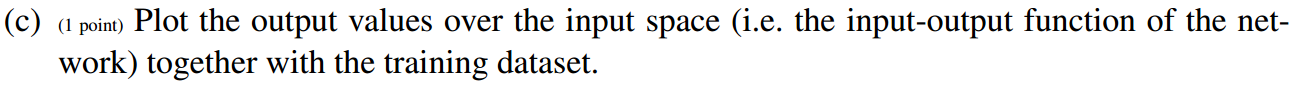

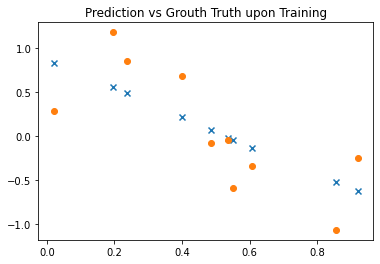

In [30]:
def plot_part_c(w,w0,lr):
  mse_history,  w_optimal , w0_optimal , y_pred = mlp_training(w, w0, lr)
  y_pred=mlp_training(w_optimal, w0_optimal, lr, training = False)[-1]

  plt.scatter(x, y_pred, marker = 'x')
  plt.scatter(x,y_t)
  plt.title('Prediction vs Grouth Truth upon Training')
  plt.show()
  return plt

axc=plot_part_c(w,w0,0.01)
axc.show()

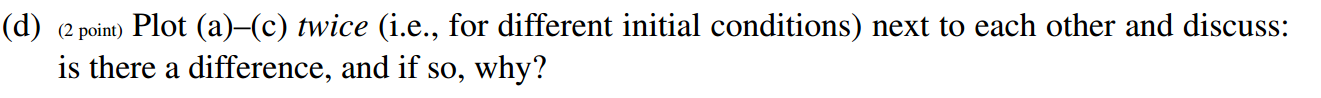

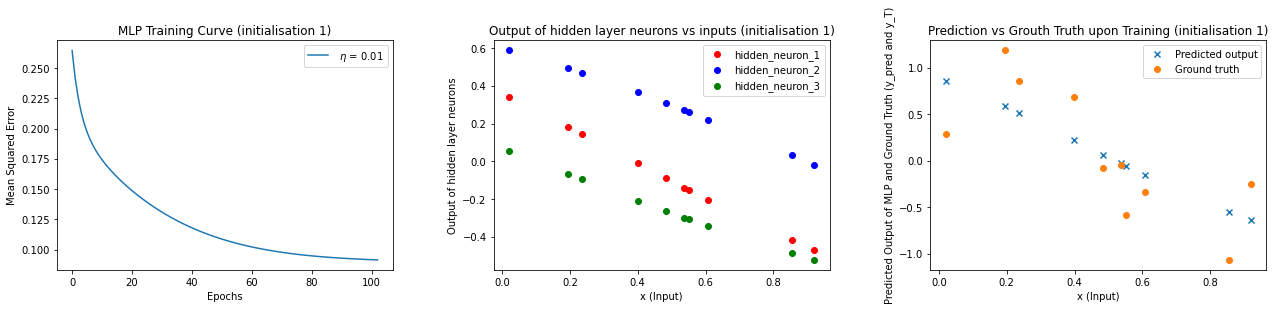

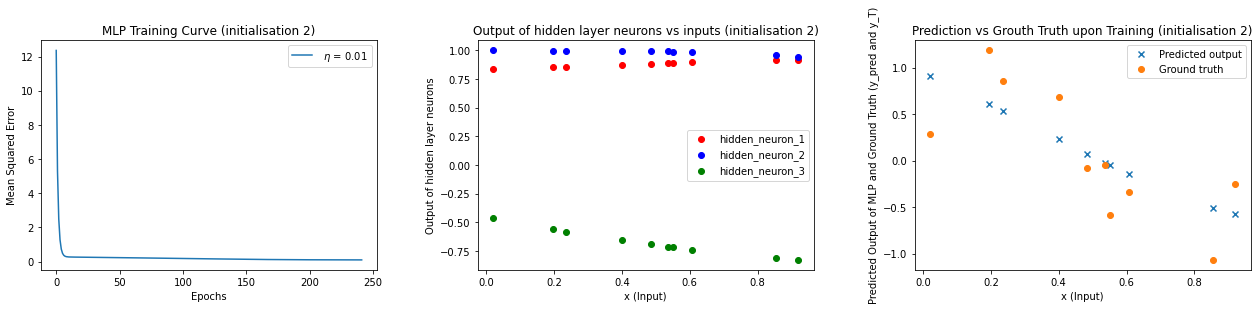

In [32]:
inputs=np.hstack((np.repeat(-1, 10).reshape(10,1) , x.reshape(10,1)))

def plot_aToc(w0,w,inputs,y_t,learning_rate=0.01,index=1):
  lr=learning_rate

  f1, (ax1, ax2, ax3) = plt.subplots(1, 3)

  #part (a)
  
  ax1.plot(mlp_training(w, w0, lr)[0], label = ' $\eta$ = %s' % 0.01  )
  ax1.set_title('MLP Training Curve (initialisation %s)'% index)
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Mean Squared Error')
  ax1.legend()
  
  #part(b)
  hidden_layer_h1 = np.matmul(w0, inputs.T)
  hidden_layer_z1 = np.tanh(hidden_layer_h1)

  ax2.scatter(inputs[:,1],hidden_layer_z1[0,:],c='r', label='hidden_neuron_1')
  ax2.scatter(inputs[:,1],hidden_layer_z1[1,:],c='b', label='hidden_neuron_2')
  ax2.scatter(inputs[:,1],hidden_layer_z1[2,:],c='g', label='hidden_neuron_3')
  
  ax2.set_title('Output of hidden layer neurons vs inputs (initialisation %s)'% index)
  ax2.set_xlabel('x (Input)')
  ax2.set_ylabel('Output of hidden layer neurons')
  ax2.legend()
  

  #part(c)
  mse_history,  w_optimal , w0_optimal , y_pred = mlp_training(w, w0, lr)
  y_pred=mlp_training(w_optimal, w0_optimal, lr, training = False)[-1]

  ax3.scatter(x, y_pred, marker = 'x',label='Predicted output')
  ax3.scatter(x,y_t,label='Ground truth')
  ax3.set_title('Prediction vs Grouth Truth upon Training (initialisation %s)'% index)
  ax3.set_xlabel('x (Input)')
  ax3.set_ylabel('Predicted Output of MLP and Ground Truth (y_pred and y_T)')
  ax3.legend()

  plt.subplots_adjust(left=0.2, bottom=0.2, right=3, top=1, wspace=0.3, hspace=5)
  plt.show()


np.random.seed(43)

#Initial condition 1
w0_1 = np.random.normal(-0.5, 0.5, size=(3,2))  
w_1 =  np.random.normal(-0.5, 0.5, size=(1,4))
plot_aToc(w0_1,w_1,inputs,y_t,learning_rate=0.01,index=1)

#Initial condition 2
w0_2 = np.random.normal(-0.5, 2, size=(3,2))  
w_2 =  np.random.normal(-0.5, 2, size=(1,4))
plot_aToc(w0_2,w_2,inputs,y_t,learning_rate=0.01,index=2)



In the first initialisation with smaller variance the mean squared error was smaller from the begining and slowly was lowering. The training of mlp with initialisation 2 (bigger variance) reduced cost function rapidly to a fraction and then lowered it slowly.

One could think, why the predictions are almost linear, do not reflect much the sinusoidal aspect of data. (It might be a bug) or it might be because the size of the network is much smaller than inputs and there are just two truth points (first and last), that don't fit linearity well. 

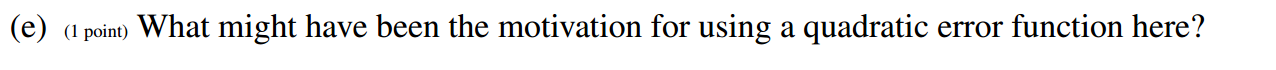

Using quadratic error function seems appropate, because the noise in the data is gaussian (by excercise design) and minimalising quadratic error function is the same as minimalizing the variance of gaussian distributed data.
Additionally, we know that optimal value exist and is unique. 